In [206]:
from scipy.io import arff # to import .arff file to a dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.impute import SimpleImputer
%matplotlib inline
os.getcwd()



'/Users/Edureka/Python'

## Import ".arff" file to a dataframe

In [207]:
data = arff.loadarff('../Autism.arff')
df = pd.DataFrame(data[0])

In [ ]:
df.sample(10)

## Lot of scope for data manipulation in this data

### Convert byte characters in columns

### convert object columns to int (having 0 or 1 values)

In [208]:
df['A1_Score'].dtype
df_objects=df.select_dtypes(include=['object'])
df[df_objects.columns]=df[df_objects.columns].apply(lambda x: x.str.decode('utf-8'))

In [ ]:
df.head()

In [ ]:
df.info()

In [209]:
df.loc[:, df.columns.str.startswith('A')]=df.loc[:, df.columns.str.startswith('A')].astype('int64')

In [ ]:
df.info()

In [ ]:
df.sample(10)

## Dataset have "?" as Nan Values. replace "?" with np.nan

In [210]:
#df1=df[df.values=='?'].replace({"?":np.nan})
cols=df.isin(['?']).columns

In [211]:
df=df[cols].replace({'?':np.nan})

In [ ]:
df.isnull().sum()

## Impute null values with Simple Imputer and Strategy as 'Most Frequent'

In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
null_cols=df.columns
df.iloc[:,[10,12,19]]=imputer.fit_transform(df.iloc[:,[10,12,9]])
df.isnull().sum()

In [ ]:
df.info()

In [214]:
categorical=[c for c in df.columns if df.dtypes[c]=='object']
continous=[c for c in df.columns if df.dtypes[c]!='object']

## Conver Catagorical to Continous variable

In [ ]:
df[categorical]=df[categorical].apply(lambda x: LabelEncoder().fit_transform(x))
df.info()

## Split the features and target values

In [216]:
target=df['Class/ASD']
features=df.drop('Class/ASD',axis=1)

## Create train and test datasets

In [217]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=999)

In [218]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((563, 20), (563,), (141, 20), (141,))

## Creat Logistic Regression Model

In [219]:
glm=LogisticRegression()

In [220]:
lgregressor=glm.fit(xtrain,ytrain)

/Users/nagarajugooty/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Predict the data using test dataset

In [221]:
predict=glm.predict(xtest)

In [ ]:
predict

## Create Confusion Matrix and Calculate Accuracy

In [223]:
cm=confusion_matrix(ytest,predict)

In [224]:
acc=accuracy_score(ytest,predict)
acc

0.9645390070921985

In [225]:
cm

array([[100,   3],
       [  2,  36]])

In [ ]:
lgregressor.predict_proba(xtest)[:,1] # probability values of two class target variables

## Plot the ROC Curve

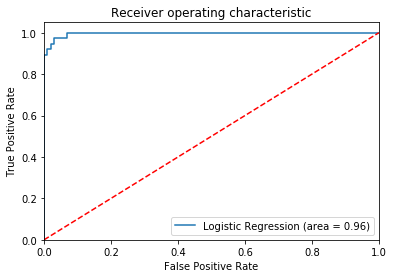

In [227]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(ytest, predict)
fpr, tpr, thresholds = roc_curve(ytest, lgregressor.predict_proba(xtest)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',)
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.annotate('local maximum', xy=(10, 1), xytext=(10, 4),
#           arrowprops=dict(facecolor='black'))

#plt.annotate('local minimum', xy=(5 * np.pi, 1), xytext=(2, 6),
#            arrowprops=dict(arrowstyle="->",
#                           connectionstyle="angle3,angleA=0,angleB=-90"));
plt.savefig('Log_ROC')
plt.show()